#Introdcution to Data Set

#The NIFTY 50 is a benchmark Indian stock market index that represents the weighted average of 50 of the largest Indian companies listed on the National Stock Exchange.[1] It is one of the two main stock indices used in India, the other being the BSE SENSEX.[2]

Nifty 50 is owned and managed by NSE Indices (previously known as India Index Services & Products Limited), which is a wholly owned subsidiary of the NSE Strategic Investment Corporation Limited.[3][4] NSE Indices had a marketing and licensing agreement with Standard & Poor's for co-branding equity indices until 2013. The Nifty 50 index was launched on 22 April 1996,[5] and is one of the many stock indices of Nifty.

#Data Set 'Nifty_monthly_OHLC.xlsx' is extracted from https://in.investing.com/indices/s-p-cnx-nifty-historical-data?end_date=1616783400&interval_sec=monthly&st_date=1041359400&interval_sec=daily

#In this data set we have Date,Price of NIFTY50 INDEX on mothly basis from year 2013 to March 2021, We are forcasting the Price of Nifty 50 Index of next 10 years from Today using Arima

#Code is reviewed from https://www.kaggle.com/freespirit08/time-series-for-beginners-with-arima


In [597]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [598]:
df=pd.read_excel('Nifty_monthly_OHLC.xlsx')
df.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,2003-03-01,978.20,1063.55,1070.85,974.1,894.12M,-0.0801
1,2003-04-01,934.05,977.40,1033.45,920.0,1.21B,-0.0451
2,2003-05-01,1006.80,930.90,1013.85,930.8,1.28B,0.0779
3,2003-06-01,1134.15,1006.85,1141.30,1004.7,1.47B,0.1265
4,2003-07-01,1185.85,1133.95,1198.50,1089.3,1.77B,0.0456


In [599]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    217 non-null    datetime64[ns]
 1   Price   217 non-null    float64       
 2   Open    217 non-null    float64       
 3   High    217 non-null    float64       
 4   Low     217 non-null    float64       
 5   Volume  217 non-null    object        
 6   Chg%    217 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 12.0+ KB


In [600]:
df.isna().sum()

Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
Chg%      0
dtype: int64

<function matplotlib.pyplot.show>

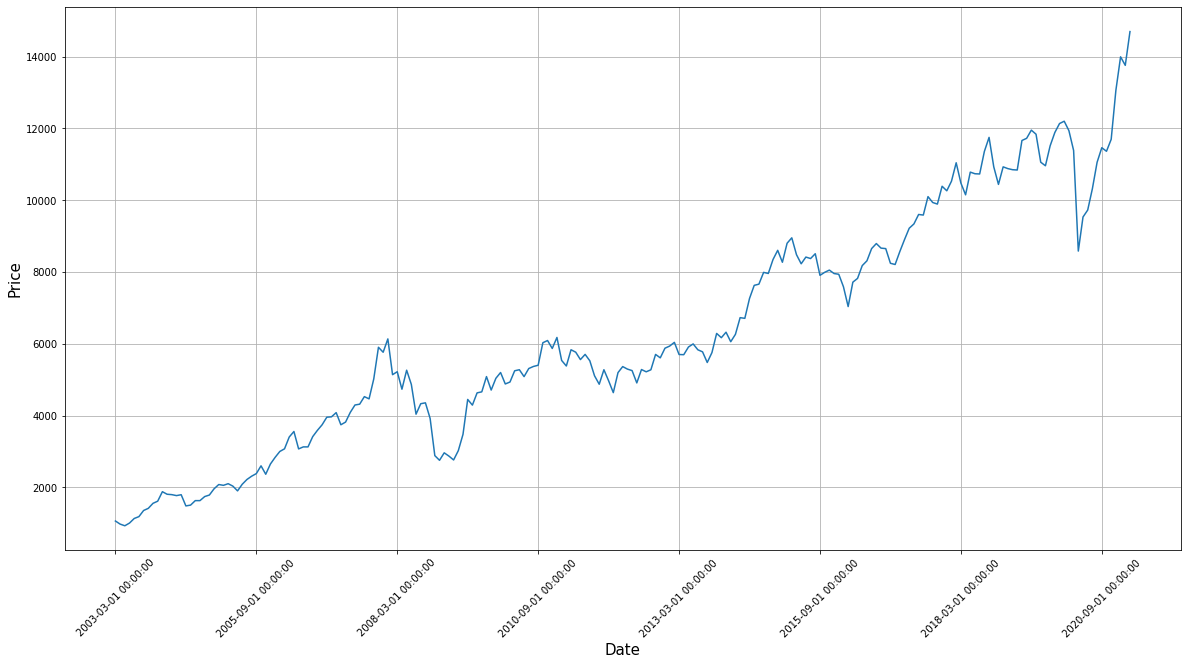

In [601]:
plt.figure(figsize=(20,10))
plt.plot(range(df.shape[0]),df['Open'])
plt.xticks(range(0,df.shape[0],30),df['Date'].loc[::30],rotation=45)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.grid()
plt.show

In [602]:
df1=df.iloc[:,[0,1]]
df1.head()
#convert from string to datetime
df1 = df1.set_index(['Date'])
df1.head(5)

,Price
Date,
2003-03-01,978.20
2003-04-01,934.05
2003-05-01,1006.80
2003-06-01,1134.15
2003-07-01,1185.85


In [603]:
#Determine rolling statistics
rolmean = df1.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = df1.rolling(window=12).std()
print(rolmean,rolstd)


                   Price
Date                    
2003-03-01           NaN
2003-04-01           NaN
2003-05-01           NaN
2003-06-01           NaN
2003-07-01           NaN
...                  ...
2020-11-01  10999.350000
2020-12-01  11150.458333
2021-01-01  11289.833333
2021-02-01  11567.116667
2021-03-01  12059.579167

[217 rows x 1 columns]                   Price
Date                   
2003-03-01          NaN
2003-04-01          NaN
2003-05-01          NaN
2003-06-01          NaN
2003-07-01          NaN
...                 ...
2020-11-01  1221.442121
2020-12-01  1466.753980
2021-01-01  1622.123539
2021-02-01  1870.996666
2021-03-01  1794.542779

[217 rows x 1 columns]


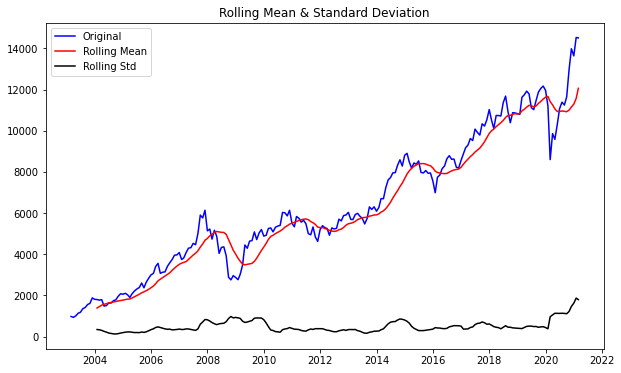

In [604]:
#Plot rolling statistics
orig = plt.plot(df1, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [605]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df1['Price'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   0.109469
p-value                          0.966702
#Lags Used                       0.000000
Number of Observations Used    216.000000
Critical Value (1%)             -3.460992
Critical Value (5%)             -2.875016
Critical Value (10%)            -2.573952
dtype: float64


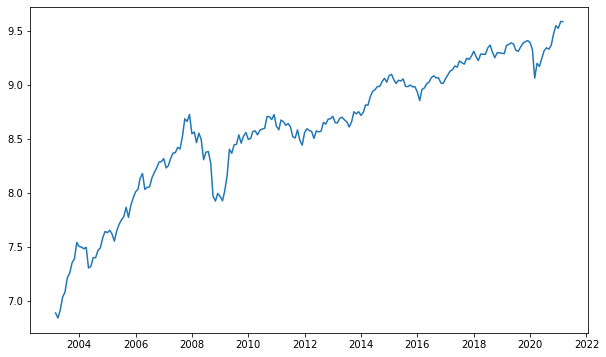

In [606]:
#Estimating trend
df1_logScale = np.log(df1)
plt.plot(df1_logScale)

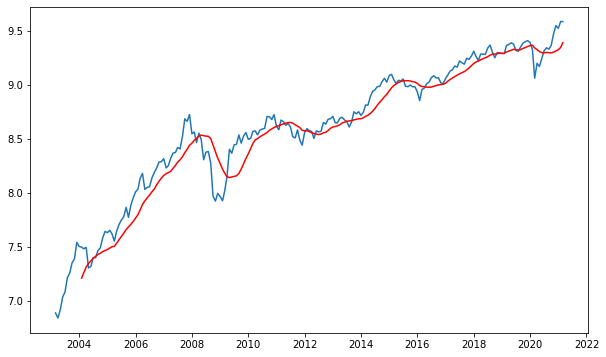

In [607]:
#The below transformation is required to make series stationary
movingAverage = df1_logScale.rolling(window=12).mean()
movingSTD = df1_logScale.rolling(window=12).std()
plt.plot(df1_logScale)
plt.plot(movingAverage, color='red')

In [608]:
datasetLogScaleMinusMovingAverage = df1_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Price
Date,
2004-02-01,0.287934
2004-03-01,0.222525
2004-04-01,0.181603
2004-05-01,-0.041851
2004-06-01,-0.050740
2004-07-01,0.003431
2004-08-01,-0.012298
2004-09-01,0.037721
2004-10-01,0.049626


In [609]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Price'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

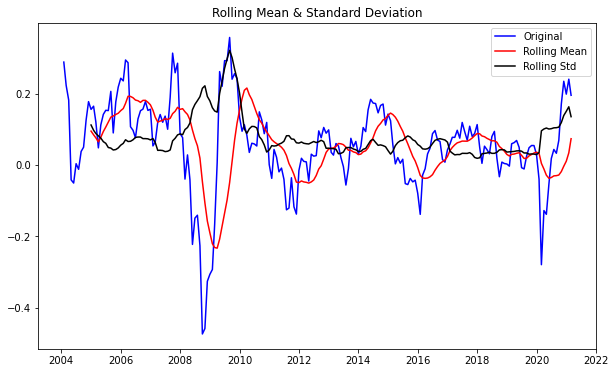

Results of Dickey Fuller Test:
Test Statistic                  -4.770130
p-value                          0.000062
#Lags Used                       4.000000
Number of Observations Used    201.000000
Critical Value (1%)             -3.463309
Critical Value (5%)             -2.876029
Critical Value (10%)            -2.574493
dtype: float64


In [610]:
test_stationarity(datasetLogScaleMinusMovingAverage)

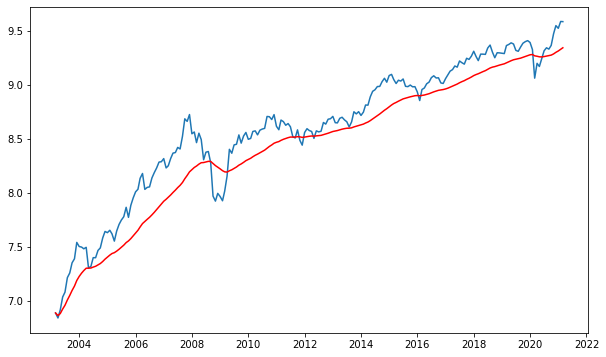

In [611]:
exponentialDecayWeightedAverage = df1_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df1_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

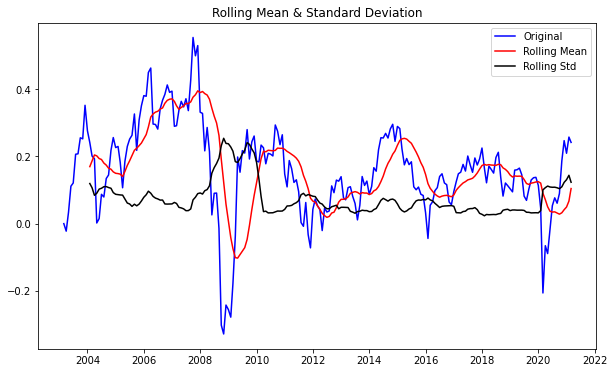

Results of Dickey Fuller Test:
Test Statistic                  -3.535697
p-value                          0.007116
#Lags Used                       0.000000
Number of Observations Used    216.000000
Critical Value (1%)             -3.460992
Critical Value (5%)             -2.875016
Critical Value (10%)            -2.573952
dtype: float64


In [612]:
datasetLogScaleMinusExponentialMovingAverage = df1_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)


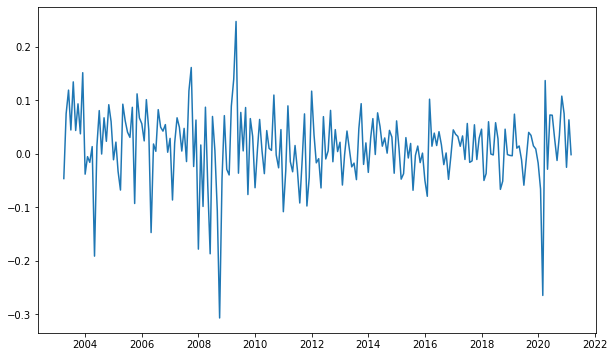

In [613]:
#Time Shift Transformation
datasetLogDiffShifting = df1_logScale - df1_logScale.shift()
plt.plot(datasetLogDiffShifting)

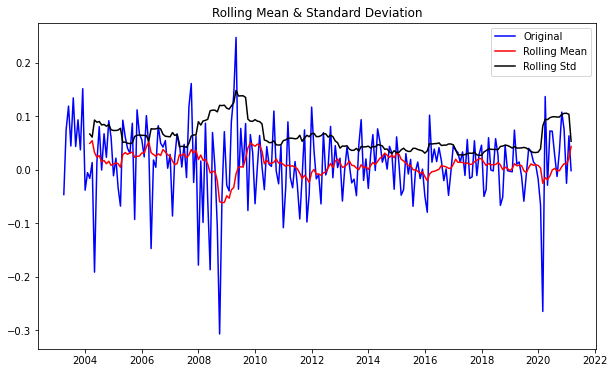

Results of Dickey Fuller Test:
Test Statistic                -1.412365e+01
p-value                        2.400522e-26
#Lags Used                     0.000000e+00
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


In [614]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


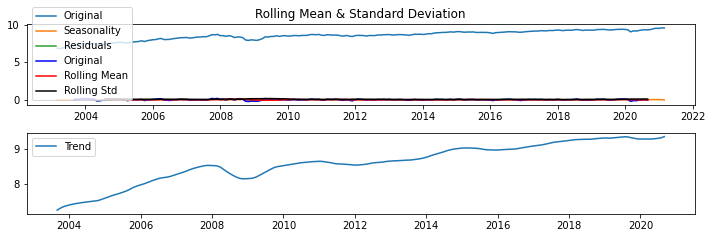

Results of Dickey Fuller Test:
Test Statistic                -8.152616e+00
p-value                        9.605412e-13
#Lags Used                     4.000000e+00
Number of Observations Used    2.000000e+02
Critical Value (1%)           -3.463476e+00
Critical Value (5%)           -2.876102e+00
Critical Value (10%)          -2.574532e+00
dtype: float64


In [615]:
decomposition = seasonal_decompose(df1_logScale) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df1_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

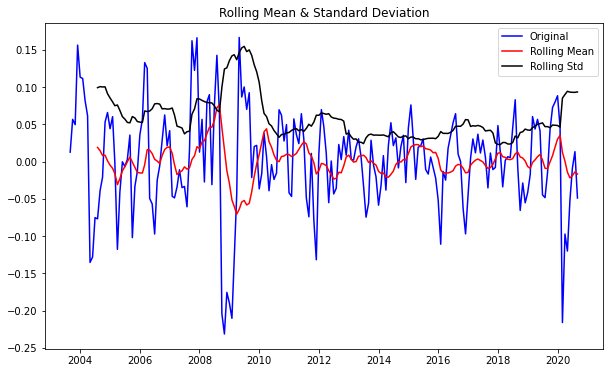

Results of Dickey Fuller Test:
Test Statistic                -8.152616e+00
p-value                        9.605412e-13
#Lags Used                     4.000000e+00
Number of Observations Used    2.000000e+02
Critical Value (1%)           -3.463476e+00
Critical Value (5%)           -2.876102e+00
Critical Value (10%)          -2.574532e+00
dtype: float64


In [616]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


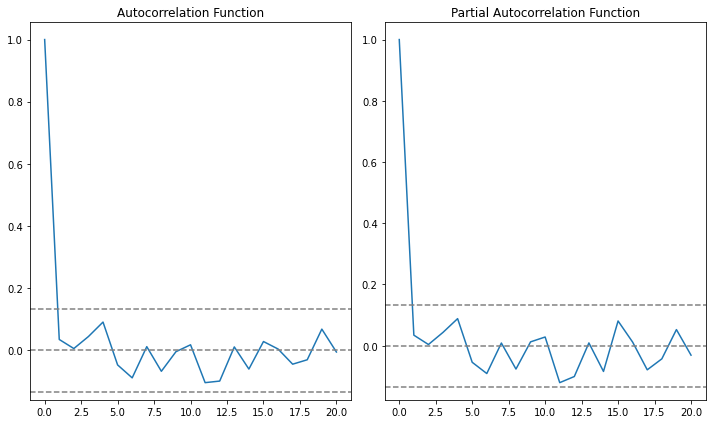

In [617]:
#ACF & PACF plots

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


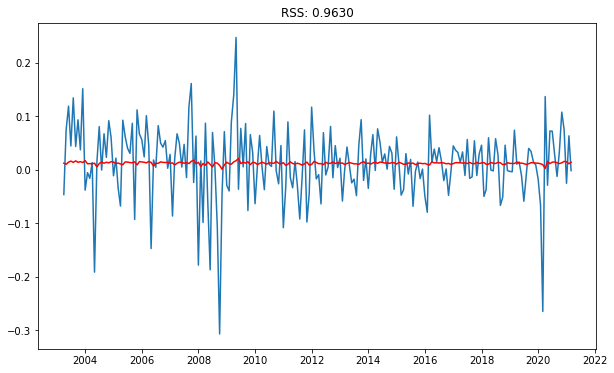

In [618]:
#AR Model
#making order=(2,1,0) gives RSS=1.5023
model = ARIMA(df1_logScale, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - datasetLogDiffShifting['Price'])**2))
print('Plotting AR model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA model


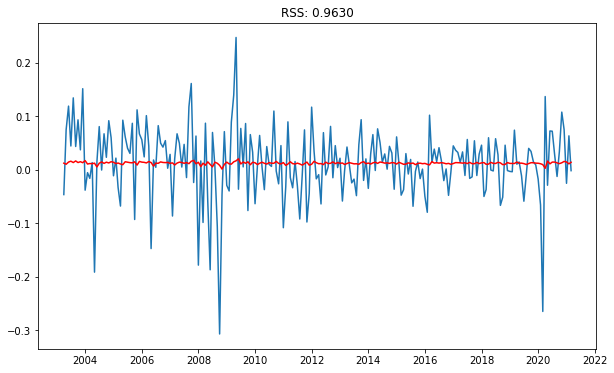

In [619]:
#MA Model
model = ARIMA(df1_logScale, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - datasetLogDiffShifting['Price'])**2))
print('Plotting MA model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Plotting ARIMA model


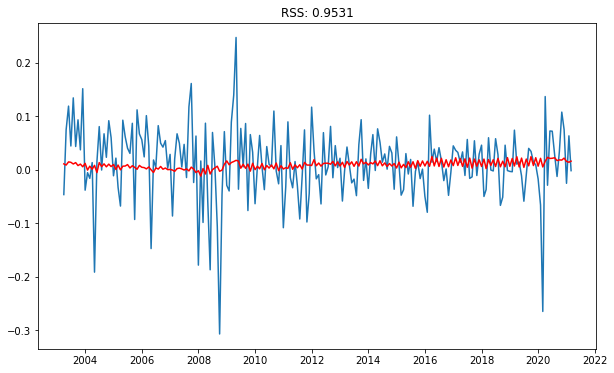

In [620]:
# AR+I+MA = ARIMA model

model = ARIMA(df1_logScale, order=(3,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['Price'])**2))
print('Plotting ARIMA model')



In [621]:
#Prediction & Reverse transformations 
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2003-04-01    0.011119
2003-05-01    0.008959
2003-06-01    0.014863
2003-07-01    0.014108
2003-08-01    0.010973
dtype: float64


In [622]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Date
2003-04-01    0.011119
2003-05-01    0.020078
2003-06-01    0.034941
2003-07-01    0.049049
2003-08-01    0.060022
                ...   
2020-11-01    1.915544
2020-12-01    1.937532
2021-01-01    1.953309
2021-02-01    1.967545
2021-03-01    1.983810
Length: 216, dtype: float64


In [623]:
predictions_ARIMA_log = pd.Series(df1_logScale['Price'].iloc[1], index=df1_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Date
2003-03-01    6.839530
2003-04-01    6.850649
2003-05-01    6.859607
2003-06-01    6.874471
2003-07-01    6.888579
dtype: float64

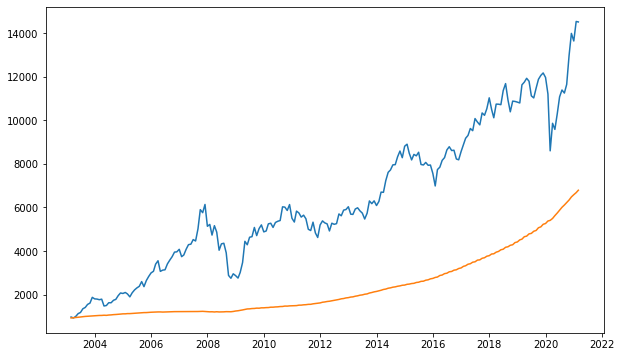

In [624]:
# Inverse of log is exp.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df1)
plt.plot(predictions_ARIMA)

In [625]:
df1_logScale

,Price
Date,
2003-03-01,6.885714
2003-04-01,6.839530
2003-05-01,6.914532
2003-06-01,7.033639
2003-07-01,7.078215
...,...
2020-11-01,9.470313
2020-12-01,9.545508
2021-01-01,9.520366


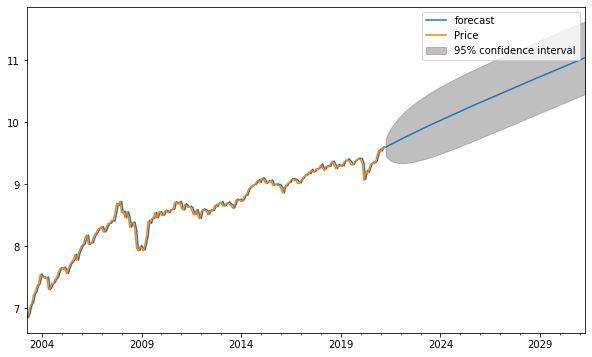

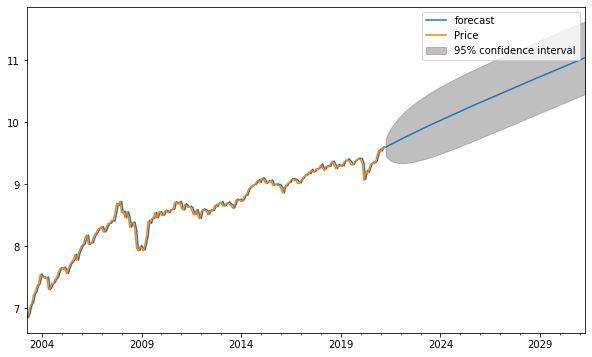

In [626]:
#We have 217 rows(existing data of 12 yrs in months) data points. 
#And we want to forecast for additional 120 data points or 10 yrs.
Total_pridect=337

results_ARIMA.plot_predict(1,337) 
#x=results_ARIMA.forecast(steps=120)



In [627]:
#print(x[1])
#print(len(x[1]))
#print(np.exp(x[1]))

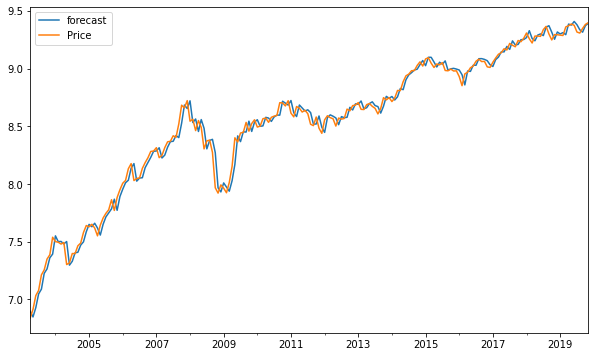

In [628]:
x=results_ARIMA.plot_predict(1,200)  #Actual vs predicted price